In [ ]:
#DEEP LEARNING PROJECT ON PNEUMONIA DETECTION
#ANIMESH RITURAJ (AP18110010338) & Sravan Mikkilineni (AP18110010363) CSE-F

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image

## Below is the X-Ray image of a person suffering from Pneumonia.

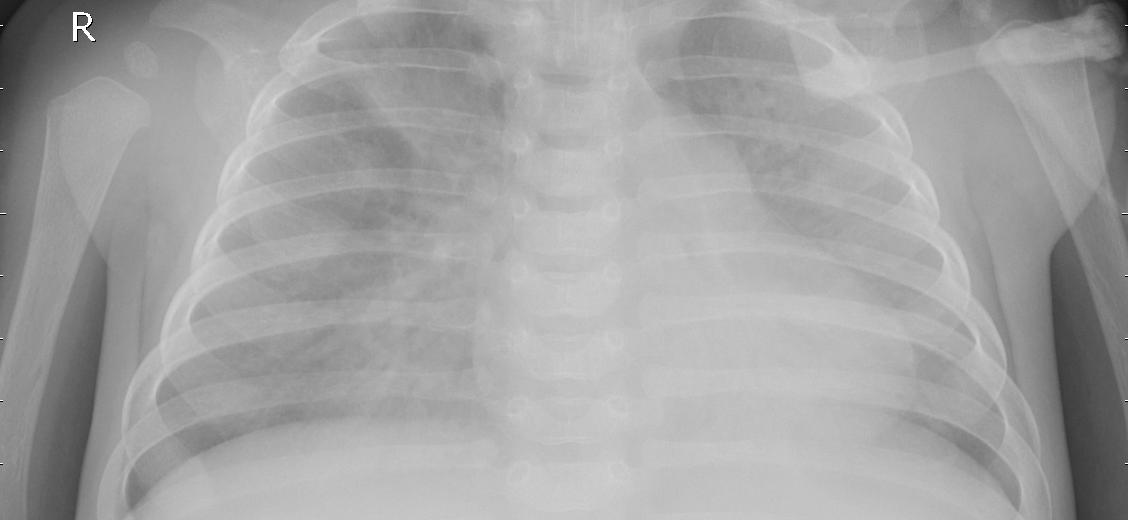

In [3]:

image="../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1011_bacteria_2942.jpeg"
PIL.Image.open(image)


## Below is the X-ray image of normal lungs.

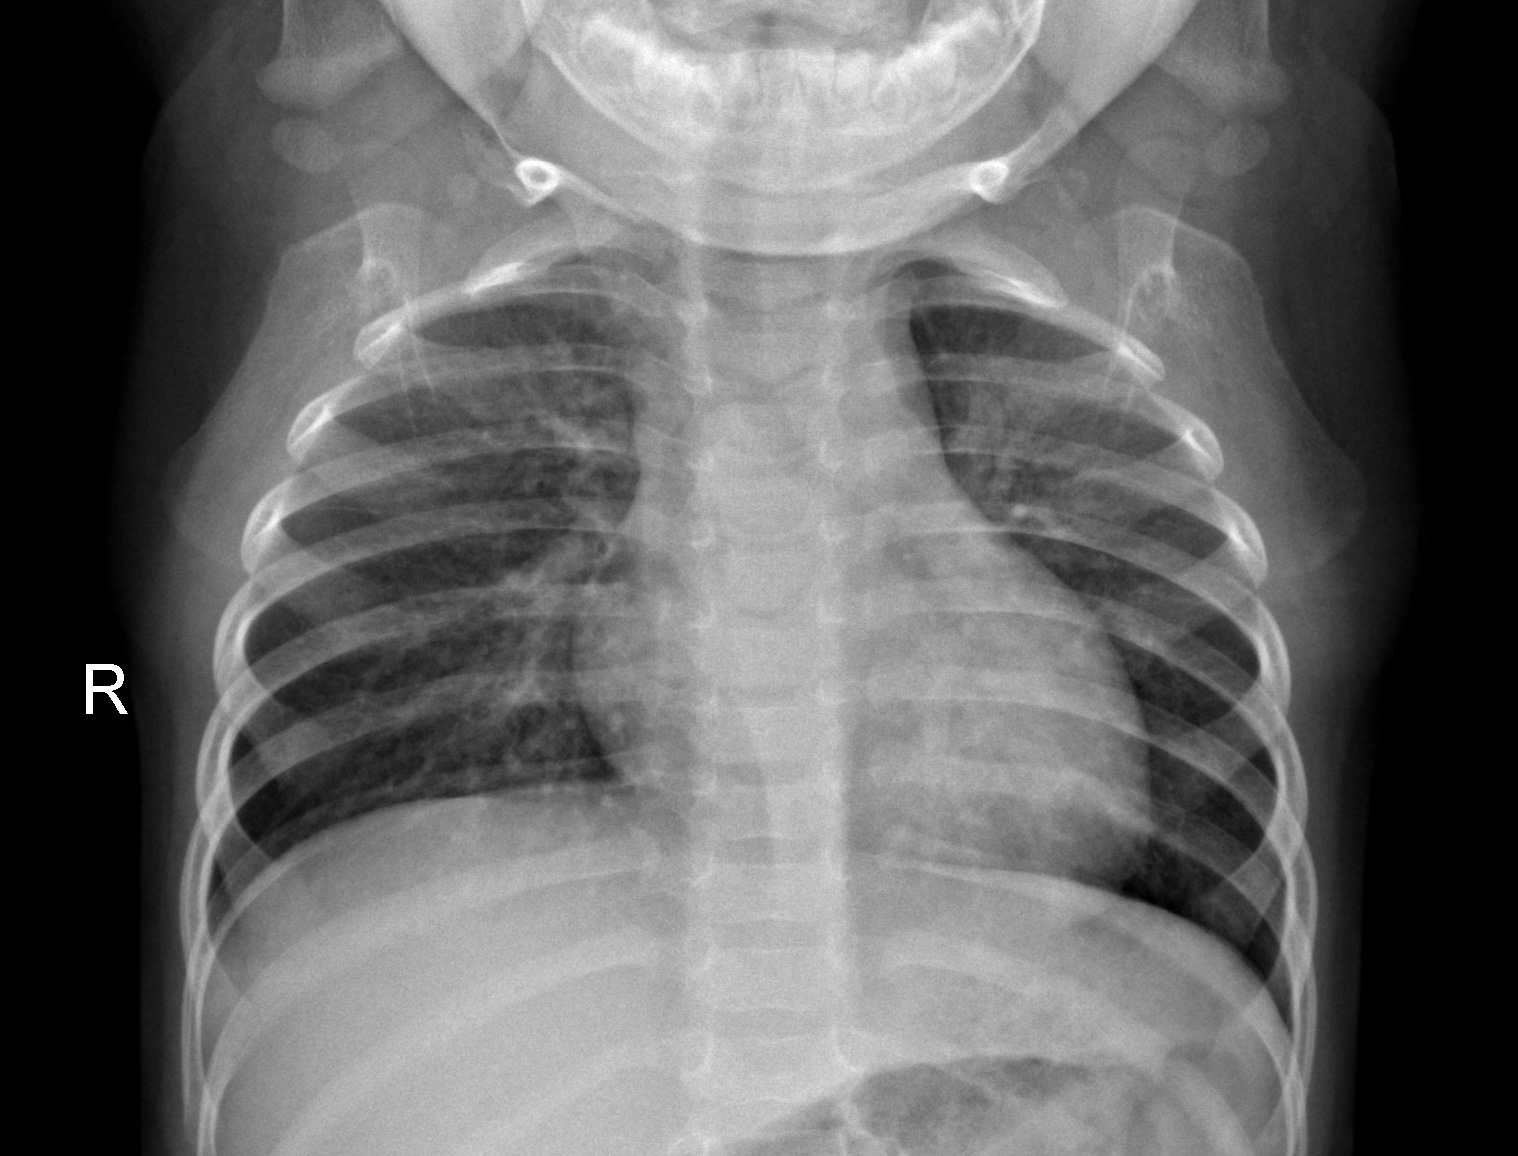

In [4]:
image="../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0151-0001.jpeg"
PIL.Image.open(image)

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to load the training and validation images

In [7]:
training_dir="../input/chest-xray-pneumonia/chest_xray/train/"
training_generator=ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
train_generator=training_generator.flow_from_directory(training_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [8]:
validation_dir="../input/chest-xray-pneumonia/chest_xray/val/"
validation_generator=ImageDataGenerator(rescale=1/255)
val_generator=validation_generator.flow_from_directory(validation_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 16 images belonging to 2 classes.


In [9]:
test_dir="../input/chest-xray-pneumonia/chest_xray/test/"
test_generator=ImageDataGenerator(rescale=1/255)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(200,200),batch_size=16,class_mode='binary')

Found 624 images belonging to 2 classes.


# Developing a Convolutional Neural Network for the classification task

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

## Using the Adam optmizer with the learning rate of 0.001

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [12]:

history = model.fit_generator(train_generator,
            validation_data = val_generator,
            
            epochs = 30,
            
            verbose = 1)

Train for 1304 steps, validate for 4 steps
Epoch 1/30
1304/1304 [==============================] - 187s 144ms/step - loss: 0.4526 - acc: 0.7939 - val_loss: 0.8139 - val_acc: 0.6250
Epoch 2/30
1304/1304 [==============================] - 173s 133ms/step - loss: 0.3057 - acc: 0.8658 - val_loss: 0.4644 - val_acc: 0.7500
Epoch 3/30
1304/1304 [==============================] - 176s 135ms/step - loss: 0.2818 - acc: 0.8792 - val_loss: 0.4266 - val_acc: 0.7500
Epoch 4/30
1304/1304 [==============================] - 178s 137ms/step - loss: 0.2636 - acc: 0.8852 - val_loss: 0.4505 - val_acc: 0.6875
Epoch 5/30
1304/1304 [==============================] - 179s 138ms/step - loss: 0.2507 - acc: 0.8911 - val_loss: 0.3782 - val_acc: 0.7500
Epoch 6/30
1304/1304 [==============================] - 178s 137ms/step - loss: 0.2355 - acc: 0.9003 - val_loss: 0.2674 - val_acc: 0.9375
Epoch 7/30
1304/1304 [==============================] - 181s 139ms/step - loss: 0.2250 - acc: 0.9089 - val_loss: 0.3840 - val_acc

# Plotting the training and validation accuracy with respect to the number of epochs

<Figure size 432x288 with 0 Axes>

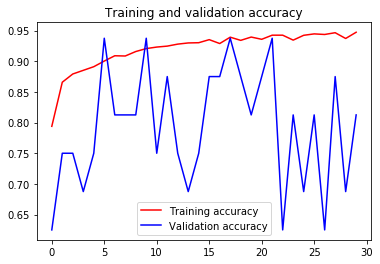

<Figure size 432x288 with 0 Axes>

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

# Now, we will test our model on the test data

In [14]:
print("Loss of the model is - " , model.evaluate(test_generator)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(test_generator)[1]*100 , "%")

39/39 [==============================] - 15s 390ms/step - loss: 0.3415 - acc: 0.9022
Loss of the model is -  34.14676814125134 %
39/39 [==============================] - 14s 360ms/step - loss: 0.3415 - acc: 0.9022
Accuracy of the model is -  90.22436141967773 %
